## Import numpy, pandas, pyplot, and seaborn
set the seaborn style

In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.weightstats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest

sns.set()

In [187]:
# full df for internal use
avo_df = pd.read_csv('avocado.csv')
avo_df["Date"] = pd.to_datetime(avo_df.Date)

## read in data

You will be using a new version of the avocado dataset. This version contains information on conventional avocados only. It also has a new column, which indicates whether the row if from a "summer month" (defined as April through September.


In [59]:
conv_avo_df = pd.read_csv('conventional_avo.csv')

In [60]:
# remind ourselves of the content of this DF
conv_avo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9126 entries, 0 to 9125
Data columns (total 15 columns):
Unnamed: 0      9126 non-null int64
Date            9126 non-null object
AveragePrice    9126 non-null float64
Total Volume    9126 non-null float64
4046            9126 non-null float64
4225            9126 non-null float64
4770            9126 non-null float64
Total Bags      9126 non-null float64
Small Bags      9126 non-null float64
Large Bags      9126 non-null float64
XLarge Bags     9126 non-null float64
type            9126 non-null object
year            9126 non-null int64
region          9126 non-null object
summer          9126 non-null bool
dtypes: bool(1), float64(9), int64(2), object(3)
memory usage: 1007.2+ KB


## convert Date column to datetime type and sort by Data

In [62]:
conv_avo_df["Date"] = pd.to_datetime(conv_avo_df["Date"])
conv_avo_df.sort_values("Date", inplace=True)

In [109]:
sorted(conv_avo_df.region.unique())

['Albany',
 'Atlanta',
 'BaltimoreWashington',
 'Boise',
 'Boston',
 'BuffaloRochester',
 'California',
 'Charlotte',
 'Chicago',
 'CincinnatiDayton',
 'Columbus',
 'DallasFtWorth',
 'Denver',
 'Detroit',
 'GrandRapids',
 'GreatLakes',
 'HarrisburgScranton',
 'HartfordSpringfield',
 'Houston',
 'Indianapolis',
 'Jacksonville',
 'LasVegas',
 'LosAngeles',
 'Louisville',
 'MiamiFtLauderdale',
 'Midsouth',
 'Nashville',
 'NewOrleansMobile',
 'NewYork',
 'Northeast',
 'NorthernNewEngland',
 'Orlando',
 'Philadelphia',
 'PhoenixTucson',
 'Pittsburgh',
 'Plains',
 'Portland',
 'RaleighGreensboro',
 'RichmondNorfolk',
 'Roanoke',
 'Sacramento',
 'SanDiego',
 'SanFrancisco',
 'Seattle',
 'SouthCarolina',
 'SouthCentral',
 'Southeast',
 'Spokane',
 'StLouis',
 'Syracuse',
 'Tampa',
 'TotalUS',
 'West',
 'WestTexNewMexico']

# Guiding questions

Is there a significant difference in the average price of avocados during summer months (defined as April 1st through Sept 30) versus winter months? Does it make a difference if you are in a colder climate versus a warmer climate? 

Steps: Filter the DataFrame down so that you have three new DataFrames, one for each of the following regions


1) Total US 

2) San Diego 

3) Boston 


In [110]:
conv_df_total_us = conv_avo_df.loc[conv_avo_df["region"]=="TotalUS"]
conv_df_sd = conv_avo_df.loc[conv_avo_df["region"]=="SanDiego"]
conv_df_bos = conv_avo_df.loc[conv_avo_df["region"]=="Boston"]

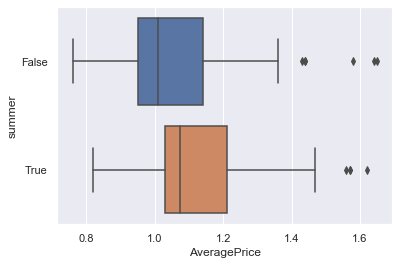

In [68]:
# create boxplots with seaborn to compare the Average Price distribution for summer and winter months
sns.boxplot(data=conv_df_total_us, x="AveragePrice", y="summer", orient="h")

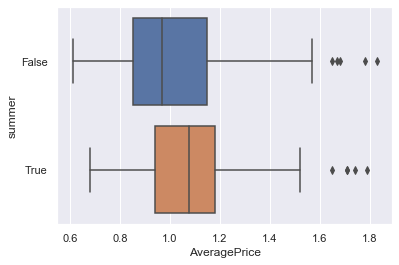

In [176]:
sns.boxplot(data=conv_df_sd, x="AveragePrice", y="summer", orient="h")

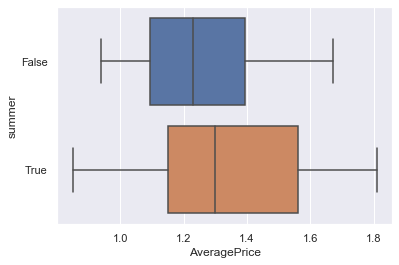

In [177]:
sns.boxplot(data=conv_df_bos, x="AveragePrice", y="summer", orient="h")

In [181]:
def split_series(df):
    summer_srs = df.loc[df["summer"]==True]["AveragePrice"]
    winter_srs = df.loc[df["summer"]==False]["AveragePrice"]
    return summer_srs, winter_srs

In [206]:
def print_diff(summer_srs, winter_srs):
    summer_mean = summer_srs.mean()
    winter_mean = winter_srs.mean()
    print(f"Summer Mean: {summer_mean}")
    print(f"Winter Mean: {winter_mean}")
    print(f"Difference in Means: {summer_mean - winter_mean}")
    print(f"Percent Difference: {100*(summer_mean - winter_mean)/winter_mean}%")

In [207]:
# Total US
summer_total_us, winter_total_us = split_series(conv_df_total_us)
print_diff(summer_total_us, winter_total_us)


Summer Mean: 1.1238461538461535
Winter Mean: 1.0647252747252747
Difference in Means: 0.05912087912087882
Percent Difference: 5.552688615956211%


In [208]:
#t-test SanDiego
summer_sd, winter_sd = split_series(conv_df_sd)
print_diff(summer_sd, winter_sd)


Summer Mean: 1.104358974358974
Winter Mean: 1.0247252747252746
Difference in Means: 0.07963369963369926
Percent Difference: 7.7712243074173015%


In [209]:
#t-test Boston
summer_bos, winter_bos = split_series(conv_df_bos)
print_diff(summer_bos, winter_bos)

Summer Mean: 1.3578205128205127
Winter Mean: 1.258571428571429
Difference in Means: 0.09924908424908385
Percent Difference: 7.885852323990768%


In [210]:
ttest_ind(summer_total_us, winter_total_us, usevar='unequal')

(2.2354802992258693, 0.026725109099811205, 165.29009272222456)

In [211]:
ttest_ind(summer_sd, winter_sd, usevar='unequal')

(2.109444157552642, 0.036405909273276166, 166.01668137546255)

In [212]:
ttest_ind(summer_bos, winter_bos, usevar='unequal')

(2.9603981924463234, 0.003583247264468476, 146.94891516001866)

In [179]:
conv_df_bos.AveragePrice.max()

1.81

In [78]:
# compare the averages
summer_prices = conv_df_total_us.loc[conv_df_total_us["summer"]==True]["AveragePrice"]
winter_prices = conv_df_total_us.loc[conv_df_total_us["summer"]==False]["AveragePrice"]
print(summer_prices.mean())
print(winter_prices.mean())


1.1238461538461535
1.0647252747252747


In [125]:
# we can see that there is a difference of about 6 cents. 
# Is this difference significant or could it be the result of chance?

# total us prices --> below 0.05
t_stat, p_val = stats.ttest_ind(summer_prices, winter_prices)
t_stat, p_val

(2.2262510139997027, 0.027335305807168114)

In [168]:
t_stat, p_val, df = stats.weightstats.ttest_ind(summer_prices, winter_prices)
t_stat, p_val

(2.2262510139997027, 0.027335305807168114)

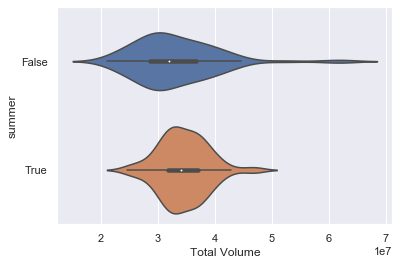

In [81]:
# what if we did it for volume instead? 
sns.violinplot(data=conv_df_total_us, x="Total Volume", y="summer", orient="h")


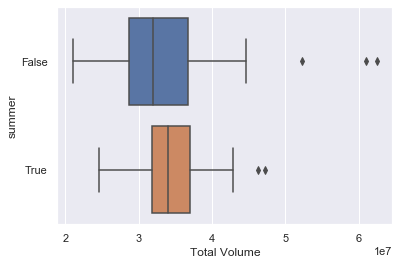

In [87]:
# we could also investigate whether this changes if we remove outliers. We know that there is a huge 
# spike during Superbowl week, which is in the winter and is what is giving the summer = False distribution 
# its long tail
sns.boxplot(data=conv_df_total_us, x="Total Volume", y="summer", orient="h")

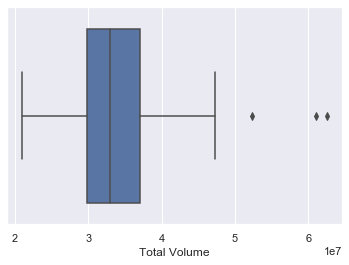

In [89]:
sns.boxplot(data=conv_df_total_us, x="Total Volume", orient="h")

In [84]:
summer_volumes = conv_df_total_us.loc[conv_df_total_us["summer"]==True]["Total Volume"]
winter_volumes = conv_df_total_us.loc[conv_df_total_us["summer"]==False]["Total Volume"]
print(summer_volumes.mean())
print(winter_volumes.mean())

34458526.5297436
33114906.78065935


In [124]:
# total us volume --> greater than 0.05
t_stat, p_val = stats.ttest_ind(summer_volumes, winter_volumes, equal_var=False)
t_stat, p_val

(1.4832818217410435, 0.14012368697375702)

In [111]:
# Let's check both volume and average price for the SD and BOS data


## SD

In [96]:
summer_prices_sd = conv_df_sd.loc[conv_df_sd["summer"]==True]["AveragePrice"]
winter_prices_sd = conv_df_sd.loc[conv_df_sd["summer"]==False]["AveragePrice"]

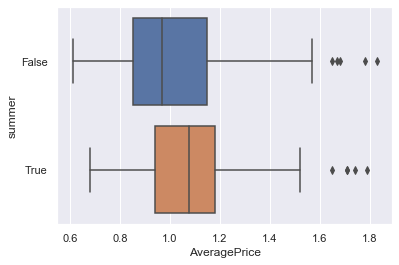

In [97]:
sns.boxplot(data=conv_df_sd, x="AveragePrice", y="summer", orient="h")

In [123]:
# SD price --> below 0.05
t_stat, p_val = stats.ttest_ind(summer_prices_sd, winter_prices_sd)
t_stat, p_val

(2.096744980268756, 0.03752282054873317)

In [101]:
summer_volume_sd = conv_df_sd.loc[conv_df_sd["summer"]==True]["Total Volume"]
winter_volume_sd = conv_df_sd.loc[conv_df_sd["summer"]==False]["Total Volume"]

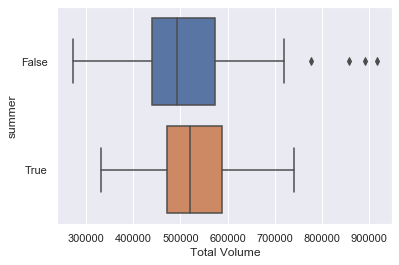

In [102]:
sns.boxplot(data=conv_df_sd, x="Total Volume", y="summer", orient="h")

In [122]:
# SD volume --> Much greater than 0.05
t_stat, p_val = stats.ttest_ind(summer_volume_sd, winter_volume_sd)
t_stat, p_val

(0.9684679921020001, 0.33421119008951883)

## BOS


In [112]:
summer_prices_bos = conv_df_bos.loc[conv_df_bos["summer"]==True]["AveragePrice"]
winter_prices_bos = conv_df_bos.loc[conv_df_bos["summer"]==False]["AveragePrice"]

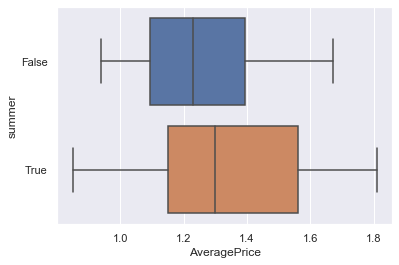

In [114]:
sns.boxplot(data=conv_df_bos, x="AveragePrice", y="summer", orient="h")

In [120]:
# Boston prices --> well under 0.05
t_stat, p_val = stats.ttest_ind(summer_prices_bos, winter_prices_bos)
t_stat, p_val

(3.0108614010001533, 0.0030097927903653854)

In [116]:
summer_volume_bos = conv_df_bos.loc[conv_df_bos["summer"]==True]["Total Volume"]
winter_volume_bos = conv_df_bos.loc[conv_df_bos["summer"]==False]["Total Volume"]

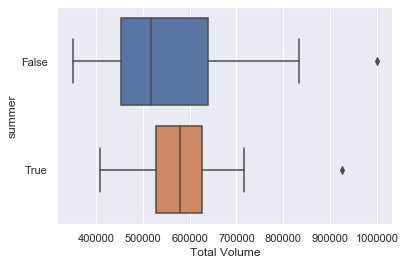

In [117]:
sns.boxplot(data=conv_df_bos, x="Total Volume", y="summer", orient="h")

In [119]:
# Boston volumes --> under 0.05
t_stat, p_val = stats.ttest_ind(summer_volume_bos, winter_volume_bos)
t_stat, p_val

(2.024120246062117, 0.04455150148997821)

## Z test

To do a test of proportions, I will create another DF. 
City, Date, Vol_Conv, Vol_Org

Question: Do people in SF buy organic avocados at a greater rate than people in LA.

In [156]:
avo_sf_la_2016 = pd.read_csv('avo_sf_la_2016.csv')

In [157]:
avo_sf_la_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 4 columns):
Date              104 non-null object
region            104 non-null object
Total_Vol_org     104 non-null float64
Total_Vol_conv    104 non-null float64
dtypes: float64(2), object(2)
memory usage: 3.4+ KB


In [158]:
# now, let's find the total volume sold for the entire year
avo_sf_la_sums = avo_sf_la_2016.groupby('region').agg({"Total_Vol_org":"sum", "Total_Vol_conv":"sum"})
avo_sf_la_sums

,Total_Vol_org,Total_Vol_conv
region,,
LosAngeles,4891080.72,1.582512e+08
SanFrancisco,1237904.51,4.029172e+07


In [161]:
# create a column for total volume across both columns
avo_sf_la_sums["Total_Volume_all"] = avo_sf_la_sums["Total_Vol_org"] + avo_sf_la_sums["Total_Vol_conv"]
avo_sf_la_sums

,Total_Vol_org,Total_Vol_conv,Total_Volume_all
region,,,
LosAngeles,4891080.72,1.582512e+08,1.631423e+08
SanFrancisco,1237904.51,4.029172e+07,4.152963e+07


In [175]:
organic_sales = avo_sf_la_sums["Total_Vol_org"]
total_sales = avo_sf_la_sums["Total_Volume_all"]

proportions_ztest(organic_sales, total_sales)

(5.830343262661636, 5.531347259060017e-09)

In [174]:
from statsmodels.stats.proportion import proportions_ztest

In [132]:
# logic to create the avo_df_la_2016 DF 

org = avo_df.loc[avo_df.type == "organic"]
conv = avo_df.loc[avo_df.type == "conventional"]

In [150]:
def filter_df(df):
    df = df.loc[df.region.isin(["SanFrancisco", "LosAngeles"])]
    df = df.loc[df.Date.dt.year==2016]
    return df

In [151]:
org_filt = filter_df(org)
conv_filt = filter_df(conv)

In [152]:
org_filt.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
13077,0,2016-12-25,1.17,81458.10,11324.90,25698.37,0.00,44434.83,37064.95,7369.88,0.0,organic,2016,LosAngeles
13078,1,2016-12-18,1.29,75362.42,8328.20,30745.08,101.67,36187.47,31983.42,4204.05,0.0,organic,2016,LosAngeles
13079,2,2016-12-11,1.31,77692.93,8725.85,29110.77,45.38,39810.93,31526.04,8284.89,0.0,organic,2016,LosAngeles
13080,3,2016-12-04,1.52,68500.56,9917.23,25081.27,10.96,33491.10,30856.88,2634.22,0.0,organic,2016,LosAngeles
13081,4,2016-11-27,1.64,63734.67,7949.89,22176.16,6.27,33602.35,28969.13,4633.22,0.0,organic,2016,LosAngeles


In [153]:
org_filt = org_filt[["Date", "region", "Total Volume"]]
org_filt.columns = ["Date", "region", "Total_Vol_org"]
conv_filt = conv_filt[["Date", "region", "Total Volume"]]
conv_filt.columns = ["Date", "region", "Total_Vol_conv"]

In [154]:
avo_sf_la_2016 = org_filt.merge(conv_filt, on=["Date", "region"])

In [155]:
avo_sf_la_2016.to_csv('avo_sf_la_2016.csv', index=False)